In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

ModuleNotFoundError: No module named 'pandas'

In [9]:
heart_data = pd.read_csv('heart.csv')

In [11]:
print("Primeras filas del dataset")
print(heart_data.head())

Primeras filas del dataset
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [12]:
print("Información del dataset")
print(heart_data.info())

Información del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [13]:
print("Estadísticas del dataset")
print(heart_data.describe())

Estadísticas del dataset
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000   

In [15]:
print("Valores nulos en el dataset")
print(heart_data.isnull().sum())

Valores nulos en el dataset
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

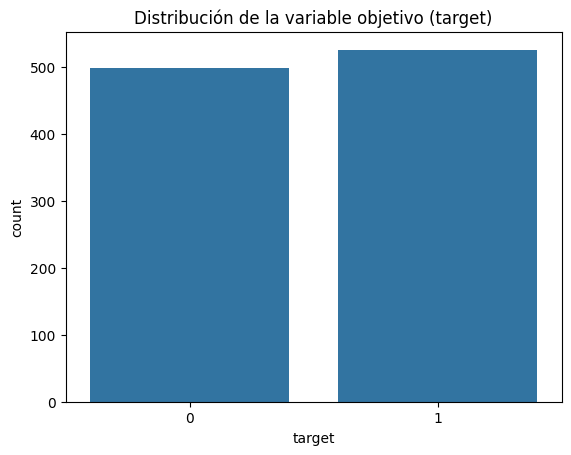

In [20]:
sns.countplot(x='target', data=heart_data)
plt.title('Distribución de la variable objetivo (target)')
plt.show()

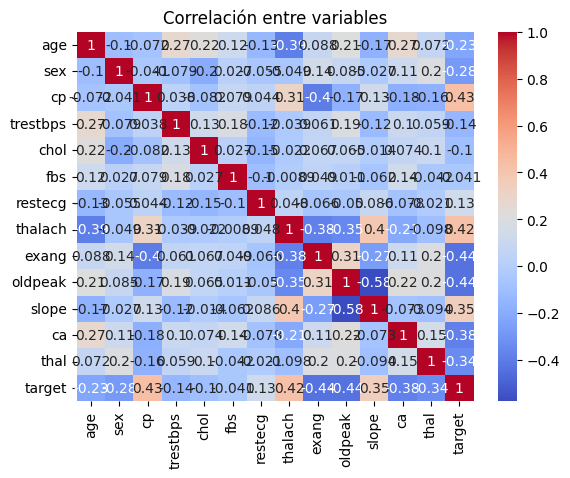

In [21]:
sns.heatmap(heart_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables')
plt.show()

In [22]:
cat_columns = ['cp', 'restecg', 'slope', 'ca', 'thal']

In [25]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
codificadas = pd.DataFrame(encoder.fit_transform(heart_data[cat_columns]), columns=encoder.get_feature_names_out(cat_columns))

In [26]:
heart_data = heart_data.drop(columns=cat_columns).reset_index(drop=True)
heart_data = pd.concat([heart_data, codificadas], axis=1)

In [27]:
scaler = StandardScaler()
num_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
heart_data[num_columns] = scaler.fit_transform(heart_data[num_columns])

In [28]:
X = heart_data.drop(columns=['target'])
y = heart_data['target']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
print("tamaño de los conjuntos de entrenamiento y prueba:")
print(f"Entremaniento: {X_train.shape}, Prueba: {X_test.shape}")

tamaño de los conjuntos de entrenamiento y prueba:
Entremaniento: (820, 22), Prueba: (205, 22)


# Actividad:
# 1. Repite el análisis exploratorio con más gráficos (ej. histogramas, gráficos de cajas).
# 2. Experimenta con diferentes métodos de codificación y escalado.
# 3. Entrena un modelo simple (ej. regresión logística) con este dataset.

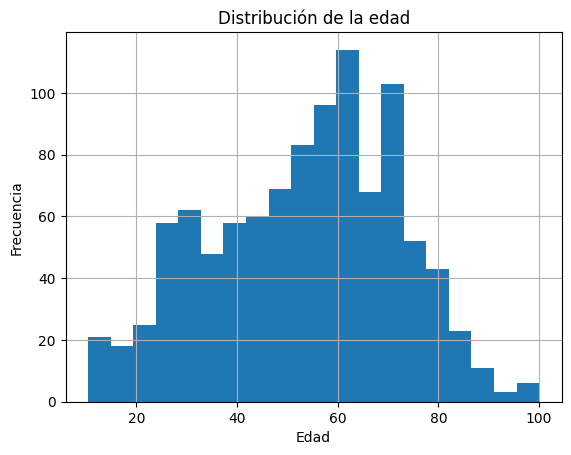

In [39]:
heart_data['age'] = heart_data['age'] * 100


heart_data['age'].hist(bins=20)
plt.title('Distribución de la edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

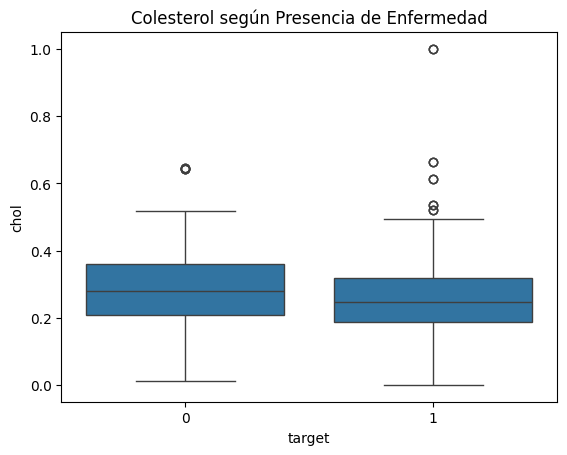

In [40]:
sns.boxplot(x='target', y='chol', data=heart_data)
plt.title('Colesterol según Presencia de Enfermedad')
plt.show()

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
heart_data[num_columns] = scaler.fit_transform(heart_data[num_columns])

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.75      0.80       102
           1       0.78      0.89      0.83       103

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205



In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.75      0.80       102
           1       0.78      0.89      0.83       103

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205



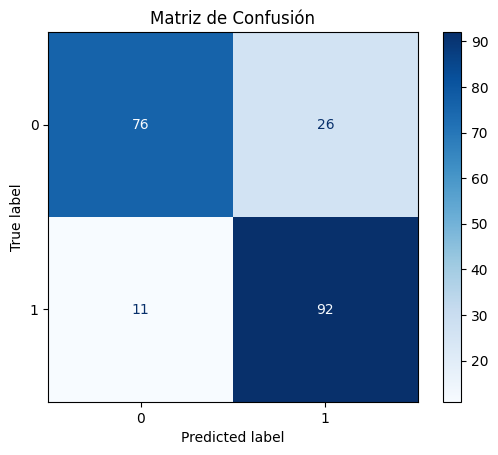

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión")
plt.show()